In [33]:
import pandas as pd
import datetime
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('fake_transactional_data_24.csv')

In [3]:
len(df)

10148280

In [4]:
df.head()

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,10371.0,4.00,CINEMA,01/01/2025
1,88339.0,2.40,40544,01/01/2025
2,18555.0,2.40,85149,01/01/2025
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025
4,80792.0,1.95,18555,01/01/2025


In [5]:
df.dtypes

from_totally_fake_account        float64
monopoly_money_amount            float64
to_randomly_generated_account     object
not_happened_yet_date             object
dtype: object

In [6]:
# check missing values
df.isnull().any(axis=0)

from_totally_fake_account        False
monopoly_money_amount            False
to_randomly_generated_account    False
not_happened_yet_date            False
dtype: bool

In [20]:
sorted_df = df.sort_values(by='from_totally_fake_account')
sorted_df.head()

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
7485526,1000.0,2.25,PRETENTIOUS_COFFEE_SHOP,28/09/2025
5977038,1000.0,18.00,WINE_BAR,03/08/2025
8456907,1000.0,6.50,5403,02/11/2025
5976980,1000.0,7.00,DVD_SHOP,03/08/2025
5976950,1000.0,6.00,5403,03/08/2025


In [9]:
sorted_df['not_happened_yet_date'] = pd.to_datetime(sorted_df['not_happened_yet_date'], format='%d/%m/%Y')
sorted_df['not_happened_yet_date'].head()

7485526   2025-09-28
5977038   2025-08-03
8456907   2025-11-02
5976980   2025-08-03
5976950   2025-08-03
Name: not_happened_yet_date, dtype: datetime64[ns]

In [10]:
len(sorted_df)

10148280

In [11]:
payers_list = sorted_df["from_totally_fake_account"].unique()
len(payers_list)

8142

In [41]:
new_df = pd.DataFrame() 

for payer in payers_list:
    payer_df = sorted_df[sorted_df.from_totally_fake_account == payer].sort_values(by='not_happened_yet_date')
    new_df = pd.concat([new_df, payer_df], ignore_index=True)

In [51]:
len(new_df)

10148280

In [50]:
new_df.to_csv("data_sorted_users_and_date.csv", index=False)

In [12]:
accounts = df['to_randomly_generated_account'].unique()
accounts

array(['CINEMA', '40544', '85149', ..., '24636', '1243', 'TURKEY_FARM'],
      dtype=object)

In [13]:
len(accounts)

14300

In [14]:
shops_account = [a for a in accounts if not a.isdigit()]
len(shops_account)

79

In [15]:
shops_account

['CINEMA',
 'HIPSTER_COFFEE_SHOP',
 'TOTALLY_A_REAL_COFFEE_SHOP',
 'COFFEE_SHOP',
 'CAFE',
 'A_CAFE',
 'LOCAL_RESTAURANT',
 'A_LOCAL_COFFEE_SHOP',
 'GOURMET_COFFEE_SHOP',
 'LOCAL_WATERING_HOLE',
 'SANDWICH_SHOP',
 'TOY_SHOP',
 'PRETENTIOUS_COFFEE_SHOP',
 'BAR',
 'PUB',
 'COMIC_BOOK_SHOP',
 'LUNCH_VAN',
 'DEPARTMENT_STORE',
 'KEBAB_SHOP',
 'WINE_BAR',
 'ELECTRONICS_SHOP',
 'RESTAURANT',
 'LOCAL_PUB',
 'LUNCH_PLACE',
 'FASHION_SHOP',
 'FASHIONABLE_SPORTSWARE_SHOP',
 'SCHOOL_SUPPLY_STORE',
 'LOCAL_BOOKSHOP',
 'TRAINER_SHOP',
 'BOOKSHOP',
 'KIDS_ACTIVITY_CENTRE',
 'VIDEO_GAME_STORE',
 'CLOTHES_SHOP',
 'TAKEAWAY_CURRY',
 'TECH_SHOP',
 'NERDY_BOOK_STORE',
 'WHISKEY_BAR',
 'PET_TOY_SHOP',
 'DVD_SHOP',
 'CHILDRENDS_SHOP',
 'GAME_SHOP',
 'INDIAN_RESTAURANT',
 'COCKTAIL_BAR',
 'RUNNING_SHOP',
 'DIY_STORE',
 'COOKSHOP',
 'HOME_IMPROVEMENT_STORE',
 'PET_SHOP',
 'CHINESE_TAKEAWAY',
 'BUTCHERS',
 'SECOND_HAND_BOOKSHOP',
 'G&T_BAR',
 'GREENGROCER',
 'JEWLLERY_SHOP',
 'ACCESSORY_SHOP',
 'TAKEAWAY',
 '

In [2]:
new_df = pd.read_csv('data_sorted_users_and_date.csv')

In [3]:
def add_label(to_account):
    coffee_words = ['COFFEE', 'CAFE', 'BEAN', 'ROASTERIE']
    bar_words = ['WATERING', 'BAR', 'PUB']
    restaurant_words = ['RESTAURANT', 'SANDWICH', 'LUNCH', 'KEBAB','COOKSHOP','STEAK', 'SEAFOOD']
    entertainment_words = ['CINEMA', 'STREAMING', 'TOY', 'DIY']
    clothes_words = ['FASHION', 'CLOTHES','TRAINER', 'CLOTHING']
    electronics_words = ['ELECTRONICS','TECH', 'DVD', 'GAME']
    sport_words = ['GYM', 'RUNNING', 'SPORT', 'SPORTSWARE']
    
    if re.search(r"TEA", to_account):
        return "tea"
    
    if re.search(r"ACCESSORY|JEWLLERY", to_account):
        return "accessory"
    
    if re.search(r"BUTCHER|TURKEY", to_account):
        return "butcher"
    
    if re.search(r"PET", to_account):
        return "pet"
    
    if re.search(r"BOOK", to_account):
        return "book"
    
    if re.search(r"DEPARTMENT|SUPERMARKET", to_account):
        return "supermarket"
    
    if re.search(r"FLORIST", to_account):
        return "flower"
    
    if re.search(r"TAKEAWAY", to_account):
        return "takeaway"
    
    if re.search(r"GREENGROCER", to_account):
        return "greengrocer"
    
    if re.search(r"HOME", to_account):
        return "home store"
    
    for word in coffee_words:
        if word in to_account:
            return "cafe"
            
    for word in bar_words:
        if word in to_account:
            return "bar"
    
    for word in restaurant_words:
        if word in to_account:
            return "restaurant"
        
    for word in sport_words:
        if word in to_account:
            return "sport"
    
    for word in entertainment_words:
        if word in to_account:
            return "entertainment"
    
    for word in electronics_words:
        if word in to_account:
            return "electronics"
    
    for word in clothes_words:
        if word in to_account:
            return "clothes"
    
    if re.search(r"CHILDREND|KID|SCHOOL", to_account):
        return "children"  
    
    if re.search(r"LIQUOR|CELLAR|WHISKEY", to_account):
        return "alcohol"
    
classification_df = new_df.copy()
classification_df = classification_df[~classification_df['to_randomly_generated_account'].str.isdigit()]
classification_df['category'] = classification_df['to_randomly_generated_account'].apply(add_label)       

In [4]:
classification_df.to_csv("data_with_customer_behavior.csv", index=False)

In [7]:
classification_df = pd.read_csv('data_with_customer_behavior.csv')

In [8]:
a = classification_df.drop_duplicates(subset=['to_randomly_generated_account'])
category = classification_df['category'].unique()

def count_class(data, cat):
    num = len(data[data['category'] == cat])
    print(f"Number of accounts about {cat}: {num}")

for cat in category:
    count_class(a, cat)

Number of accounts about entertainment: 4
Number of accounts about cafe: 11
Number of accounts about bar: 8
Number of accounts about restaurant: 11
Number of accounts about electronics: 6
Number of accounts about pet: 2
Number of accounts about takeaway: 3
Number of accounts about clothes: 4
Number of accounts about supermarket: 5
Number of accounts about children: 3
Number of accounts about alcohol: 3
Number of accounts about book: 5
Number of accounts about tea: 2
Number of accounts about sport: 4
Number of accounts about butcher: 3
Number of accounts about greengrocer: 1
Number of accounts about home store: 1
Number of accounts about flower: 1
Number of accounts about accessory: 2


In [7]:
new_a = a[['to_randomly_generated_account','category']]
filtered_a = new_a[~new_a['to_randomly_generated_account'].str.isnumeric()]

income_df = pd.read_csv('monthly_incomes.csv')
income_with_label_df = pd.merge(income_df, filtered_a)
income_with_label_df

,to_randomly_generated_account,month,total_monthly_income,category
0,ACCESSORY_SHOP,1,6238.00,accessory
1,ACCESSORY_SHOP,2,6213.00,accessory
2,ACCESSORY_SHOP,3,6545.00,accessory
3,ACCESSORY_SHOP,4,5867.00,accessory
4,ACCESSORY_SHOP,5,6447.00,accessory
...,...,...,...,...
921,WINE_CELLAR,8,8590.82,alcohol
922,WINE_CELLAR,9,9602.72,alcohol
923,WINE_CELLAR,10,9572.62,alcohol
924,WINE_CELLAR,11,9717.53,alcohol


In [8]:
income_with_label_df.to_csv("monthly_incomes_with_label.csv", index=False)

In [9]:
high_payment_df = pd.read_csv('high_payment_records.csv')
high_payment_with_label_df = pd.merge(high_payment_df, filtered_a, how='left')
high_payment_with_label_df.to_csv("high_payment_records_with_label.csv", index=False)

In [10]:
high_reciept_df = pd.read_csv('high_reciept_records.csv')
high_reciept_with_label_df = pd.merge(high_reciept_df, filtered_a, how='left')
high_reciept_with_label_df.to_csv("high_reciept_records_with_label.csv", index=False)

In [10]:
classification_df['not_happened_yet_date'] = pd.to_datetime(classification_df['not_happened_yet_date'])
classification_df['month'] = classification_df['not_happened_yet_date'].dt.month
monthly_behaviors_expenses = classification_df.groupby(['from_totally_fake_account', 'month', 'category'])['monopoly_money_amount'].sum().reset_index()
monthly_behaviors_expenses = monthly_behaviors_expenses.pivot_table(index=['from_totally_fake_account','month'], columns='category', values='monopoly_money_amount',fill_value=0, aggfunc='first').reset_index()
monthly_behaviors_expenses['total'] = monthly_behaviors_expenses.drop(['from_totally_fake_account','month'], axis=1).sum(axis=1)
monthly_behaviors_expenses

category,from_totally_fake_account,month,accessory,alcohol,bar,book,butcher,cafe,children,clothes,...,flower,greengrocer,home store,pet,restaurant,sport,supermarket,takeaway,tea,total
0,1000.0,1,0,0.00,374.27,0,0.0,195.15,0,0,...,0,0.0,0,54,22.60,0,0.00,57.96,0.00,833.86
1,1000.0,2,0,0.00,432.11,0,0.0,163.98,0,0,...,0,0.0,0,0,155.76,0,0.00,118.77,0.00,895.62
2,1000.0,3,0,0.00,422.49,0,0.0,149.85,0,145,...,0,0.0,0,32,91.92,0,0.00,24.29,0.00,888.55
3,1000.0,4,0,0.00,387.92,0,0.0,160.75,0,0,...,0,0.0,0,5,65.00,0,42.42,121.84,0.00,799.93
4,1000.0,5,0,0.00,404.50,0,0.0,139.45,0,0,...,0,0.0,0,25,61.74,0,54.31,51.84,0.00,758.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97699,100988.0,8,0,0.00,424.07,0,0.0,67.55,92,82,...,0,0.0,0,0,235.58,0,288.45,62.86,0.00,1252.51
97700,100988.0,9,0,9.00,236.57,0,0.0,40.90,0,281,...,0,0.0,0,0,154.93,0,53.65,0.00,0.00,834.05
97701,100988.0,10,0,24.99,327.31,0,0.0,108.22,21,237,...,0,0.0,0,0,113.00,0,378.65,48.78,0.00,1407.95
97702,100988.0,11,0,0.00,443.48,0,0.0,78.95,103,603,...,0,0.0,0,0,132.20,0,221.06,0.00,0.00,1581.69


In [12]:
# percentage of customer behavior spendings
def calculate_ratio(data, category):
    for cat in category:
        data['ratio of ' + cat] =(data[cat]  / data['total']) * 100 
    return data

monthly_behaviors_expenses = calculate_ratio(monthly_behaviors_expenses, category)

In [19]:
monthly_behaviors_expenses

category,from_totally_fake_account,month,accessory,alcohol,bar,book,butcher,cafe,children,clothes,...,ratio of supermarket,ratio of children,ratio of alcohol,ratio of book,ratio of tea,ratio of sport,ratio of butcher,ratio of greengrocer,ratio of home store,ratio of flower
0,1000.0,1,0,0.00,374.27,0,0.0,195.15,0,0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
1,1000.0,2,0,0.00,432.11,0,0.0,163.98,0,0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
2,1000.0,3,0,0.00,422.49,0,0.0,149.85,0,145,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
3,1000.0,4,0,0.00,387.92,0,0.0,160.75,0,0,...,5.302964,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
4,1000.0,5,0,0.00,404.50,0,0.0,139.45,0,0,...,7.156976,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97699,100988.0,8,0,0.00,424.07,0,0.0,67.55,92,82,...,23.029756,7.345251,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
97700,100988.0,9,0,9.00,236.57,0,0.0,40.90,0,281,...,6.432468,0.000000,1.079072,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
97701,100988.0,10,0,24.99,327.31,0,0.0,108.22,21,237,...,26.893711,1.491530,1.774921,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
97702,100988.0,11,0,0.00,443.48,0,0.0,78.95,103,603,...,13.976190,6.512022,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0


In [20]:
monthly_behaviors_expenses.to_csv("monthly_behaviors_expenses.csv", index=False)

In [16]:
classification_df = pd.read_csv('data_with_customer_behavior.csv')
classification_df['not_happened_yet_date'] = pd.to_datetime(classification_df['not_happened_yet_date'])
classification_df['year'] = classification_df['not_happened_yet_date'].dt.year
yearly_behaviors_expenses = classification_df.groupby(['from_totally_fake_account', 'year', 'category'])['monopoly_money_amount'].sum().reset_index()
yearly_behaviors_expenses = yearly_behaviors_expenses.pivot_table(index=['from_totally_fake_account','year'], columns='category', values='monopoly_money_amount',fill_value=0, aggfunc='first').reset_index()
yearly_behaviors_expenses['total'] = yearly_behaviors_expenses.drop(['from_totally_fake_account','year'], axis=1).sum(axis=1)

yearly_behaviors_expenses = calculate_ratio(yearly_behaviors_expenses)

yearly_behaviors_expenses

category,from_totally_fake_account,year,accessory,alcohol,bar,book,butcher,cafe,children,clothes,...,ratio of children,ratio of alcohol,ratio of book,ratio of tea,ratio of sport,ratio of butcher,ratio of greengrocer,ratio of home store,ratio of flower,ratio of accessory
0,1000.0,2025,0,114.98,4611.90,8,0.00,2023.38,92,213,...,0.877405,1.096566,0.076296,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,1002.0,2025,0,154.97,4459.47,0,0.00,525.11,99,282,...,1.081297,1.692612,0.000000,0.223468,0.677176,0.000000,0.000000,0.000000,0.0,0.0
2,1006.0,2025,0,107.95,4184.30,412,1484.98,2075.95,598,558,...,4.063745,0.733581,2.799771,0.213109,0.000000,10.091271,9.715681,0.000000,0.0,0.0
3,1018.0,2025,0,39.99,2523.50,20,1016.00,85.33,59,2009,...,0.521916,0.353753,0.176921,2.258302,0.743066,8.987563,8.516512,0.628068,0.0,0.0
4,1053.0,2025,0,179.97,3875.21,0,18.00,819.48,133,2561,...,1.012237,1.369716,0.000000,0.256027,0.875242,0.136994,0.106551,2.237576,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8137,100931.0,2025,0,279.95,5630.58,353,1220.18,771.78,94,450,...,0.605668,1.803795,2.274476,0.102512,9.536046,7.861954,7.795588,0.000000,0.0,0.0
8138,100934.0,2025,0,93.98,4414.10,518,0.00,625.26,0,195,...,0.000000,0.695517,3.833558,0.063942,0.000000,0.000000,0.081408,0.000000,0.0,0.0
8139,100947.0,2025,0,78.96,4918.29,503,27.00,815.73,120,221,...,0.750646,0.493925,3.146460,0.071061,0.000000,0.168895,0.000000,0.000000,0.0,0.0
8140,100986.0,2025,0,128.95,4861.13,35,0.00,105.10,0,235,...,0.000000,1.018373,0.276410,0.000000,9.547983,0.000000,0.039487,0.000000,0.0,0.0


In [4]:
yearly_behaviors_expenses = pd.read_csv('yearly_behaviors_expenses.csv')

In [24]:
def ave_ratio(data, category):
    ave_behaviors_expenses = pd.DataFrame()    
    ave_behaviors_expenses['category'] = category
    for cat in category:
        ave_behaviors_expenses.loc[ave_behaviors_expenses['category'] == cat, 'value'] = data['ratio of ' + cat].mean()
    
    return ave_behaviors_expenses

ave_behaviors_expenses = ave_ratio(yearly_behaviors_expenses, category)

In [25]:
ave_behaviors_expenses

,category,value
0,entertainment,1.891283
1,cafe,7.041070
2,bar,33.240998
3,restaurant,8.169107
4,electronics,2.628598
5,pet,0.358190
6,takeaway,6.339659
7,clothes,5.926761
8,supermarket,23.177236
9,children,2.478911


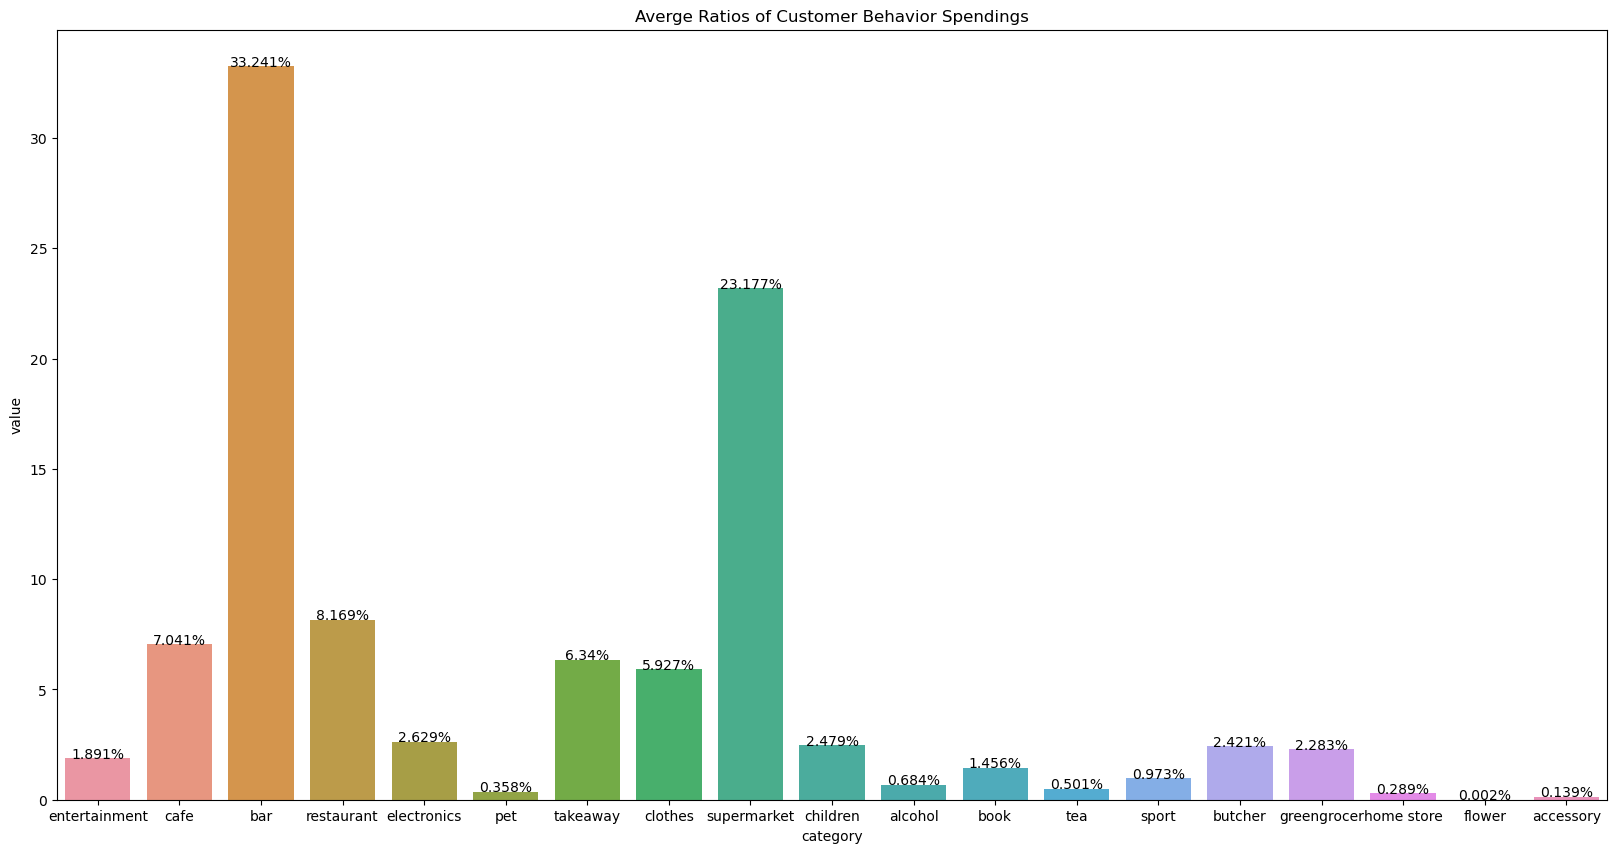

In [51]:
plt.figure(figsize=(20, 10))
sns.barplot(data=ave_behaviors_expenses, x='category', y='value')
plt.title('Averge Ratios of Customer Behavior Spendings')

for index, row in ave_behaviors_expenses.iterrows():
    plt.text(index, row.value, f'{round(row.value, 3)}%', color='black', ha="center")

plt.show()